In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# 生成示例数据
def generate_time_series(num_steps):
    time = np.arange(0, num_steps)
    data = np.sin(0.1 * time) + np.random.normal(0, 0.1, size=num_steps)
    return data

# 生成数据
num_steps = 1000
data = generate_time_series(num_steps)

In [5]:
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# 设置滑动窗口大小
window_size = 20
X, y = create_dataset(data, window_size)

# 转换为 PyTorch 张量
X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # 形状: (样本数, 时间步长, 特征数)
y = torch.tensor(y, dtype=torch.float32)

In [6]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # LSTM 输出: (batch_size, seq_len, hidden_size)
        out, _ = self.lstm(x)
        # 只取最后一个时间步的输出
        out = self.fc(out[:, -1, :])
        return out

# 定义模型参数
input_size = 1  # 输入特征数
hidden_size = 50  # LSTM 隐藏层大小
output_size = 1  # 输出特征数

# 初始化模型
model = LSTMModel(input_size, hidden_size, output_size)

In [7]:
# 定义损失函数和优化器
criterion = nn.MSELoss()  # 均方误差损失
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Adam 优化器

In [8]:
# 训练模型
num_epochs = 20
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X), batch_size):
        # 获取小批量数据
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]

        # 前向传播
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/20], Loss: 0.1021
Epoch [2/20], Loss: 0.0562
Epoch [3/20], Loss: 0.0500
Epoch [4/20], Loss: 0.1123
Epoch [5/20], Loss: 0.1458
Epoch [6/20], Loss: 0.1511
Epoch [7/20], Loss: 0.1444
Epoch [8/20], Loss: 0.1430
Epoch [9/20], Loss: 0.1426
Epoch [10/20], Loss: 0.1420
Epoch [11/20], Loss: 0.1418
Epoch [12/20], Loss: 0.1415
Epoch [13/20], Loss: 0.1413
Epoch [14/20], Loss: 0.1412
Epoch [15/20], Loss: 0.1410
Epoch [16/20], Loss: 0.1409
Epoch [17/20], Loss: 0.1407
Epoch [18/20], Loss: 0.1406
Epoch [19/20], Loss: 0.1403
Epoch [20/20], Loss: 0.1403


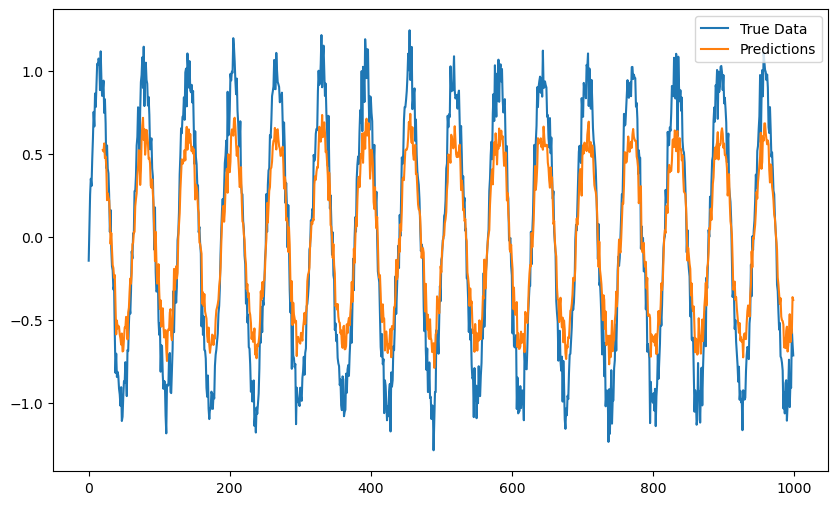

In [9]:
# 预测
model.eval()  # 将模型设置为评估模式
with torch.no_grad():
    predictions = model(X).squeeze().numpy()

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(data, label='True Data')
plt.plot(np.arange(window_size, len(data)), predictions, label='Predictions')
plt.legend()
plt.show()